In [1]:
import gymnasium as gym
from RL.ActorCritic import ActorCriticAgent

# Initialize the CartPole environment and agent
env = gym.make('Pendulum-v1', g=9.81)
state_size = env.observation_space.shape[0]
action_size = env.action_space.shape[0]
action_max = env.action_space.high

state_size, action_size, action_max

(3, 1, array([2.], dtype=float32))

In [2]:
agent = ActorCriticAgent(state_size, action_size, hidden_dim=32, action_max=action_max, lr=1e-2)

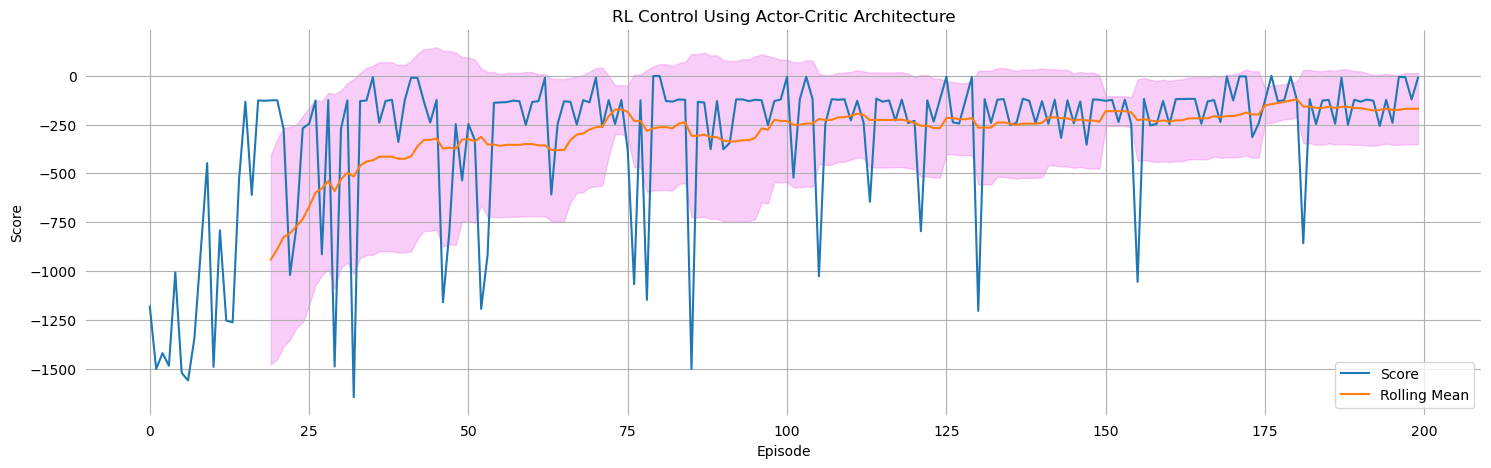

In [3]:
result = agent.train(env, episodes=200)

In [4]:

env = gym.make('Pendulum-v1', g=9.81, render_mode='human')

score = 0
done = False
truncated = False
state, _ = env.reset()
while not done and not truncated:
    action = agent.actor.select_action(state)
    next_state, reward, done, truncated, info = env.step((action.item(),))
    env.render()
    score += reward
    state = next_state
print(score)
env.close()